#  Trees

**Motivation**

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.

The most commonly used binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes. The trick, of course, comes in deciding which questions to ask at each step. In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the data into two groups using a cutoff value within one of the features. Let's now look at an example of this.

Consider the following two-dimensional data, which has one of four class labels:

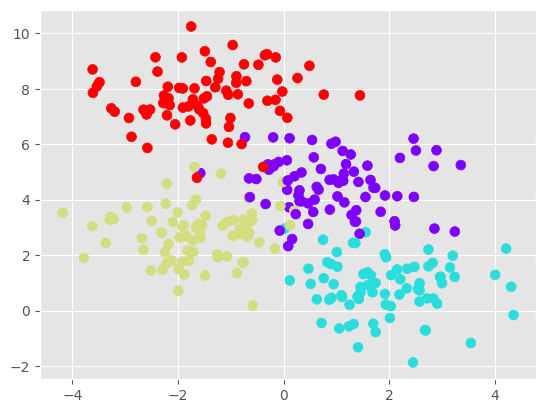

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

**Side-Note:**
* From [GeeksforGeeks](https://www.geeksforgeeks.org/sys-path-in-python): "*When a module is imported within a Python file, the interpreter first searches for the specified module among its built-in modules. If not found it looks through the list of directories defined by `sys.path`.*" 
    * **`import sys`**
    * `sys.path`
* Add your own module directory to Python with:
    * `sys.path.append()`

**Decision Tree Levels**
<img src="figures/05.08-decision-tree-levels.png" width=1000>

### Node Impurity in trees

A classification tree is built by the following process: first the single variable
is found which best splits the data into two groups (`best` will be defined
shortly).  The data is separated, and then this process is applied
*separately* to each sub-group, and so on recursively until the subgroups either reach a minimum size or until no improvement can be made.

The partitioning method can be applied to many different kinds of
data.  We will start by looking at the classification problem,
which is one of the more instructive cases (but also has the
most complex equations).
The sample population consists of $n$ observations from $K$ classes.  A given
model will break these observations into $k$ terminal groups;
to each of these groups is assigned a predicted class.

Most tree algorithms use one of several measures of impurity, or diversity, of a node.  Let us denote $\hat{p}_{mk}$ as the proportion of training observations in the $m$th region that are from the $k$th class. We then define the *Gini index* as
$$
G_m = \sum_{i=1}^K { \hat{p}_{mk}(1 - \hat{p}_{mk} ) }
$$
Remembering $p (1-p)$ to be the variance of the Bernoulli distribution, the Gini index measures the total variance across the $K$ classes. For nearly "pure" regions (all $\hat{p}_{mk}$ being close to 0 or 1), it takes on a very small value.

An alternative measure is given by the information index or *cross entropy* 
$$
D_m = - \sum_{i=1}^K { \hat{p}_{mk} \log{ \hat{p}_{mk} } }
$$

NOTE: The expressions above are general enough for multiple category classification and hence more complicated than the version discussed in class.For binary outcomes $(y \in 0,1)$ the Gini index reduces to simply
$$
G_m = 2 \hat{p}_m (1 - \hat{p}_m ) 
$$

The two impurity functions are plotted in the figure below,
along with a rescaled version of the Gini measure.
For the two class problem the measures differ only slightly, and
will nearly always choose the same split point.

<img src="figures/Gini1.png" width=400>

For example, in a two-class problem with 400 observations in each class (denote this by (400, 400)), suppose one split created nodes (300, 100) and (100, 300), while the other created nodes (200, 400) and (200, 0). Compute the misclassification rate and write it down formally.

**Explanations and examples at:**

https://scikit-learn.org/stable/modules/tree.html

In [7]:
import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

sns.set_style('white')

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from graphviz import Source
import graphviz

plt.rcParams["figure.figsize"]=3,3
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names, 
                                precision = 1,
                    filled=True, rounded=True, )  
graph = graphviz.Source(dot_data)  
#graph


![iris_tree_1.png](figures/iris_tree_1.png)

In [3]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

### Regression Trees

In R, I exported the dataset from package 'ISLR' to a csv file.

In [4]:
df = pd.read_csv('data/Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    f

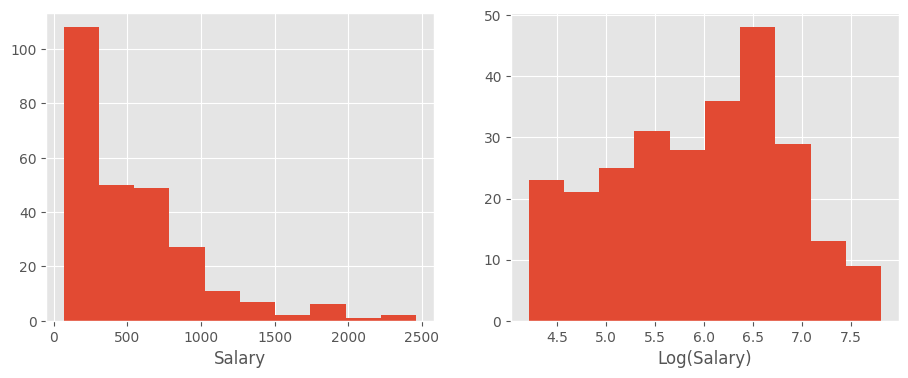

In [5]:
X = df[['Years', 'Hits']].values
y = np.log(df.Salary.values)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df.Salary.values)
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)');

In [8]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

#### Figure 8.1

In [ ]:
dot_data = tree.export_graphviz(regr, out_file=None,
                                feature_names=['Years', 'Hits'], 
                                precision = 1,
                    filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
#graph 

![hitters_tree1.png](figures/hitters_tree1.png)

**FIGURE 8.1** For the Hitters data, a regression tree for predicting the log
salary of a baseball player, based on the number of years that he has played in
the major leagues and the number of hits that he made in the previous year. At a
given internal node, the label (of the form Xj < tk) indicates the left-hand branch
emanating from that split, and the right-hand branch corresponds to Xj ≥ tk.
For instance, the split at the top of the tree results in two large branches. The
left-hand branch corresponds to Years<4.5, and the right-hand branch corresponds
to Years>=4.5. The tree has two internal nodes and three terminal nodes, or
leaves. The number in each leaf is the mean of the response for the observations
that fall there.

####  Figure 8.2

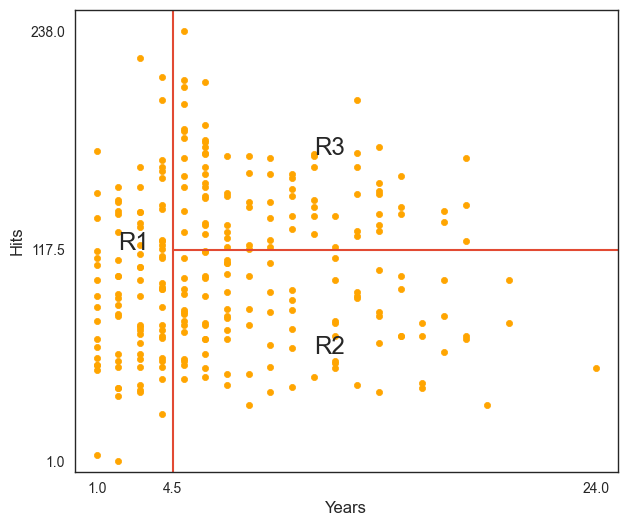

In [14]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

#### Pruning
This is currently not supported in scikit-learn. See first point under 'disadvantages of decision trees in the <A href='http://scikit-learn.github.io/dev/modules/tree.html#'>documentation</A>. Implementation has been <A href='https://github.com/scikit-learn/scikit-learn/pull/941'>discussed</A> but Random Forests have better predictive qualities than a single pruned tree anyway if I understand correctly.
    

### Classification Trees

Dataset available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [15]:
df2 = pd.read_csv('data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [16]:
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]

In [17]:
X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]

In [18]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2,y2)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [19]:
clf.score(X2,y2)

0.8047138047138047

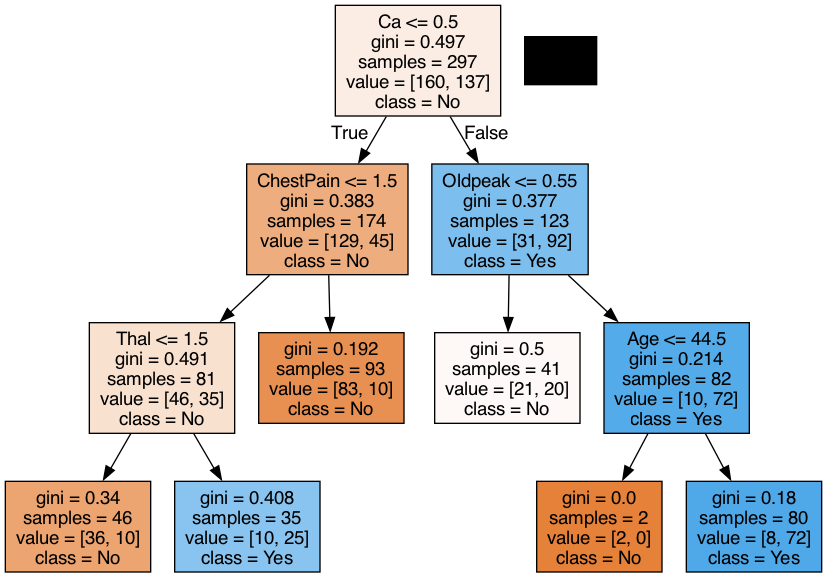

In [20]:
graph2, = print_tree(clf, features=X2.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())

### dtreeviz

We are using the wonderful tree visualization library `dtreeviz` :
https://github.com/parrt/dtreeviz

In [16]:
clf1 = DecisionTreeClassifier(max_depth=3)  # limit depth of tree
iris = load_iris()
clf1.fit(iris.data, iris.target)         

DecisionTreeClassifier(max_depth=3)

In [17]:
from IPython.display import display, HTML
#!pip install dtreeviz
#from dtreeviz.trees 
import dtreeviz

viz=dtreeviz.model(clf1, 
   iris.data, 
   iris.target,
   target_name='variety',
   feature_names=iris.feature_names, 
   class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
  )  

#uncomment this ni the notebook (comment necessary to produce html book because of svg issues in latex):
#viz.view()

![iris_dtreeviz.svg.png](figures/iris_dtreeviz.svg.png)

#### Quiz

1. Outliers
   * Classification Trees are resistant to outliers
   * Regression Trees are resistant to outliers
2. Is "diversity" good or bad for prediction?
3. The regions are disjoint and rectangular
4. Interactions need to be explicitly be modeled like in regression.
5. All rows with missing values in any column need to be removed
6. Nature of trees
   * Are trees "local" or "global" models?
   * Trees are piecewise constant models

### Lab

#### Fitting Classification Trees

In R, I exported the dataset from package 'ISLR' to a csv file.

In [24]:
df3 = pd.read_csv('data/Carseats.csv').drop('Unnamed: 0', axis=1)
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [25]:
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]

df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
df3.US = df3.US.map({'No':0, 'Yes':1})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
 11  High         400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [26]:
df3.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [27]:
X = df3.drop(['Sales', 'High'], axis=1)
y = df3.High

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [28]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=6)

In [29]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       236
           1       0.98      0.82      0.89       164

    accuracy                           0.92       400
   macro avg       0.93      0.90      0.91       400
weighted avg       0.92      0.92      0.92       400



In [30]:
#graph3, = print_tree(clf, features=X.columns, class_names=['No', 'Yes'])
#Image(graph3.create_png())

In [31]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [32]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,99,32
Yes,19,50


In [33]:
# Precision of the model using test data is 74%
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       118
           1       0.72      0.61      0.66        82

    accuracy                           0.74       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.74      0.74      0.74       200



Pruning not implemented in scikit-learn.

#### Fitting Regression Trees

In R, I exported the dataset from package 'MASS' to a csv file.

In [11]:
boston_df = pd.read_csv('data/Boston.csv')
bostonX = boston_df.drop('medv',axis=1)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
from sklearn.datasets import *

regr = tree.DecisionTreeRegressor(max_depth=3)
regr.fit(bostonX, boston_df["medv"])

DecisionTreeRegressor(max_depth=3)

In [ ]:
viz = dtreeviz.model(regr,
               bostonX,
               boston_df["medv"],
               target_name='price',
               feature_names=bostonX.columns)
              
   
#uncomment this in the notebook (comment necessary to produce html book because of svg issues in latex):
#viz.view()

![boston_dtreeviz.png](figures/boston_dtreeviz.png)